In [ ]:
from IPython.external import mathjax; mathjax.install_mathjax()

In [ ]:
datasets:
	basic_stats
	customer_zipcodes
	age_distribution
	gender_distribution
	payment_distribution
	demographic distribution
	expenditure-time_curve

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
merchants Number of merchants 
cards Number of differents cards 
payments Number of transactions 
avg payment Average transaction 
max payment Maximum transaction 
min payment Minimum transaction 
std Standard deviation

In [67]:
folder = "../dataset/"
names=['zipcode','date','category','merchant','card', 'payment', 'avg', 'max', 'min', 'std']
basic_stats = pd.io.parsers.read_table(folder + 'basic_stats000',sep='\t', names=names, parse_dates=["date"])

basic_stats["amount"] = basic_stats["payment"]* basic_stats["avg"]
basic_stats["avgpaybymerch"] = basic_stats["payment"]/ basic_stats["merchant"]
basic_stats["amountbymerch"] = basic_stats["amount"]/ basic_stats["merchant"]
basic_stats["avgReppays"] = basic_stats["payment"] / basic_stats["card"]
basic_stats["weekday"] = basic_stats["date"].map(lambda d: (d.weekday()))
basic_stats["day"] = basic_stats["date"].map(lambda d: ('{0:%d}-{0:%a}'.format(d)))
#print basic_stats.describe()

In [36]:
basic_stats[:1]

,zipcode,date,category,merchant,card,payment,avg,max,min,std,amount,avgpaybymerch,amountbymerch,avgReppays,weekday,day
0,8001,2014-07-01,es_barsandrestaurants,76,405,410,27.28,600,0.1,47.253606,11184.8,5.394737,147.168421,1.012346,1,01-Tue


In [3]:
#total de pasta en el mes de julio
basic_stats["amount"].sum()


214150826.66

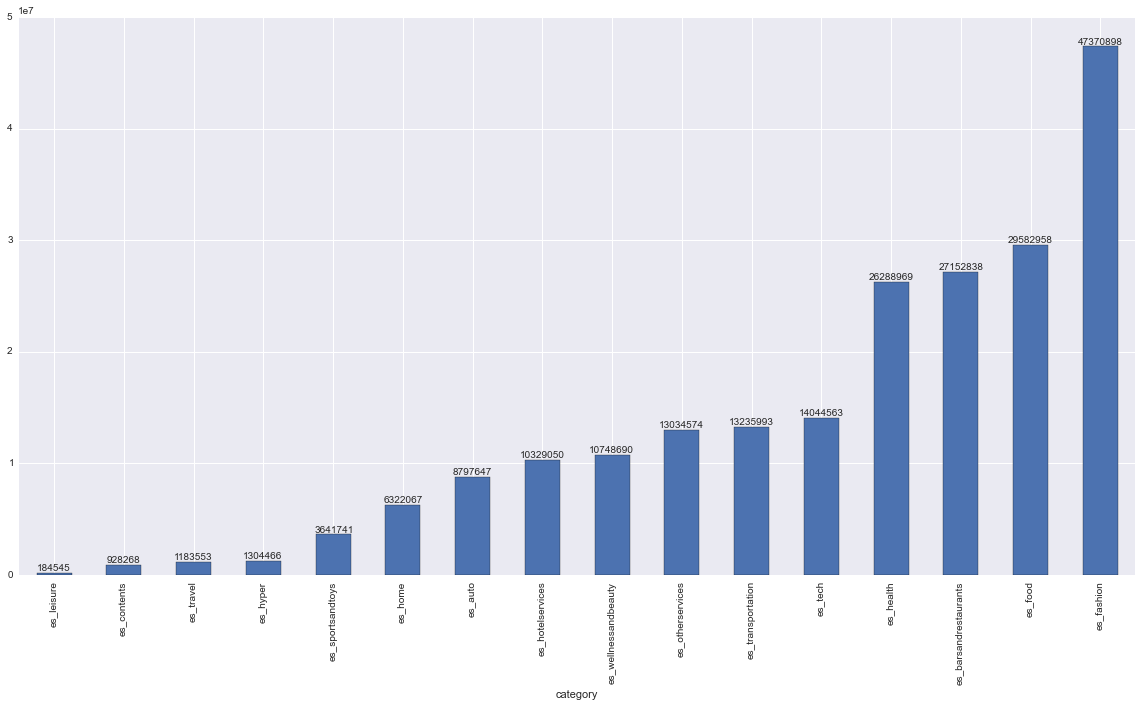

In [4]:
basic_statsbycategory=pd.pivot_table(basic_stats, values='amount', index=['category'], aggfunc=np.sum)
basic_statsbycategory= basic_statsbycategory.order()
#por rebajas se gasta el doble en fashion que en comida
#realmente en la primera semana de rebajas ??? x10?
#los cps de las rebajas???
plt.figure(figsize=(20,10))
basic_statsbycategory.plot(kind='bar',legend=None)
for i, y in enumerate(basic_statsbycategory.values):
    plt.text(i, y + 150, '%d' % y, ha='center', va='bottom')

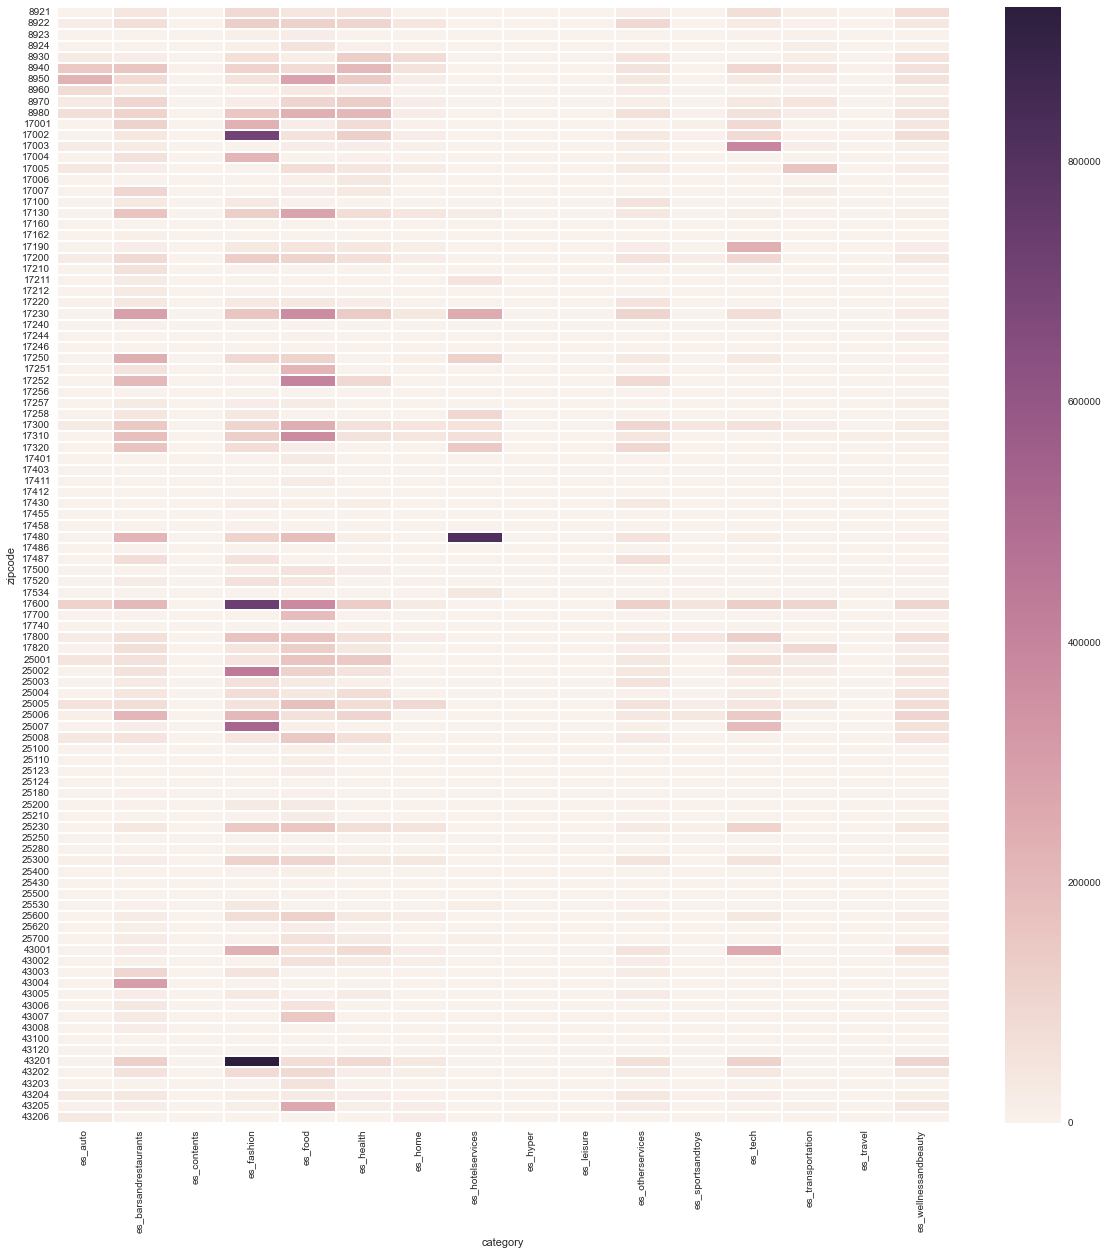

In [5]:
plt.figure(figsize=(20,20))
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=['zipcode'],columns = ['category'], aggfunc=np.sum)
sns.heatmap(pivbasic_stats[200:300])

In [83]:
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=['date'],columns = ['category'], aggfunc=np.sum)
#data=pd.Series(basic_stats.category.values).dropna()
#data
pivbasic_stats[:3]

category,es_auto,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
date,,,,,,,,,,,,,,,,
2014-07-01,339680.49,655165.78,43895.29,3393414.13,950004.14,1121292.06,240641.96,294603.84,69729.03,NaN,550184.91,190565.03,756065.52,304448.27,54969.92,413461.61
2014-07-02,377742.68,686178.66,42257.39,2668882.94,981653.74,1160956.25,247865.14,241390.69,64103.85,1927.30,531510.96,153541.72,532046.19,442741.06,80923.40,435978.60
2014-07-03,416372.11,754021.15,39976.13,2264188.96,976223.76,1118943.70,235968.74,332532.95,47902.60,1549.41,523368.87,151772.66,532355.36,535212.66,41467.73,451972.02


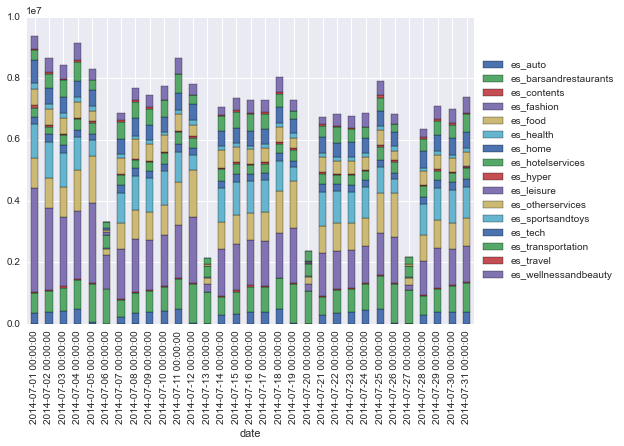

In [84]:
pivbasic_stats.plot(kind="bar", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

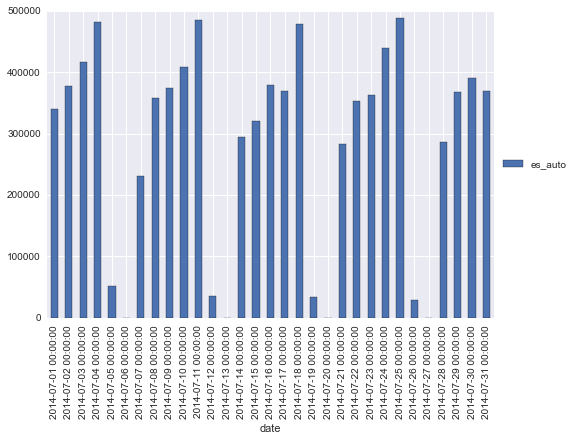

In [85]:
pivbasic_stats.es_auto.plot(kind="bar", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

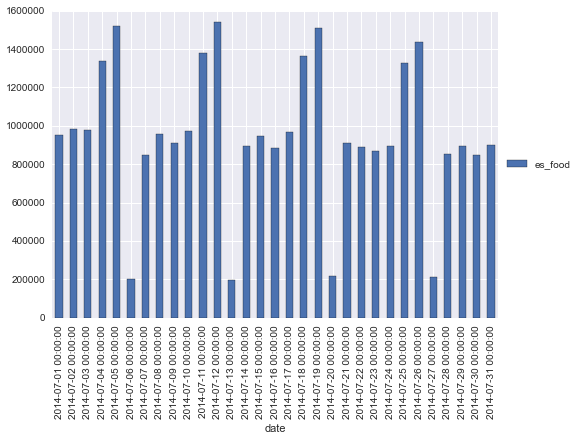

In [86]:
pivbasic_stats.es_food.plot(kind="bar", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

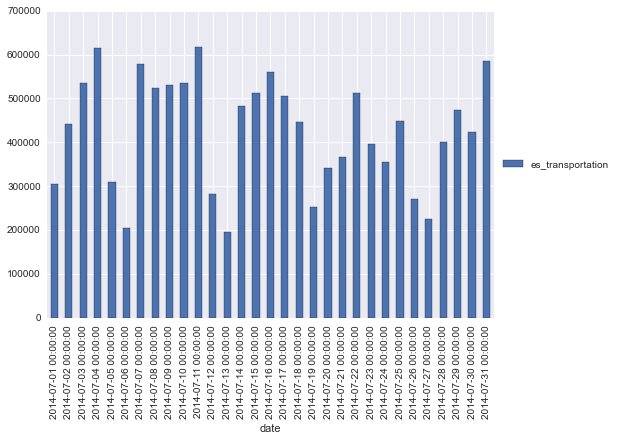

In [87]:
pivbasic_stats.es_transportation.plot(kind="bar", stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

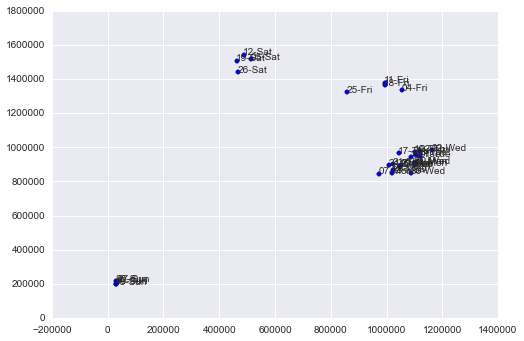

In [88]:
#by='zipcode'
by='day'
#by='weekday'
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=[by],columns = ['category'], aggfunc=np.sum)
fig, ax = plt.subplots()
x=pivbasic_stats.es_health
y=pivbasic_stats.es_food
ax.scatter(x, y)
pivbasic_stats.index
pivbasic_stats.es_fashion.values
for i, txt in enumerate(pivbasic_stats.index):
    ax.annotate(txt, (x.values[i],y.values[i]))

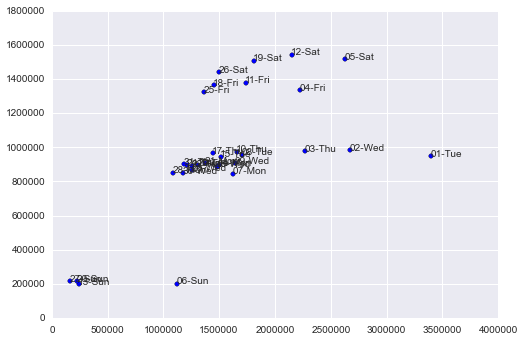

In [89]:
#by='zipcode'
by='day'
#by='weekday'
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=[by],columns = ['category'], aggfunc=np.sum)
fig, ax = plt.subplots()
x=pivbasic_stats.es_fashion
y=pivbasic_stats.es_food
ax.scatter(x, y)
pivbasic_stats.index
pivbasic_stats.es_fashion.values
for i, txt in enumerate(pivbasic_stats.index):
    ax.annotate(txt, (x.values[i],y.values[i]))

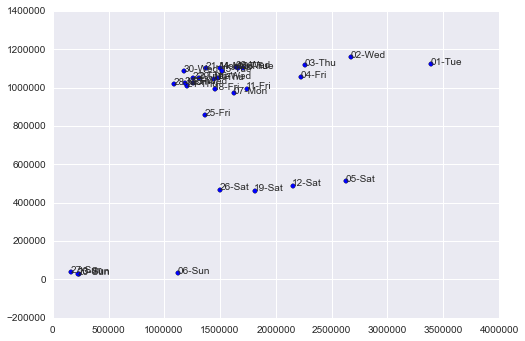

In [26]:
#by='zipcode'
by='day'
#by='weekday'
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=[by],columns = ['category'], aggfunc=np.sum)
fig, ax = plt.subplots()
x=pivbasic_stats.es_fashion
y=pivbasic_stats.es_health
ax.scatter(x, y)
pivbasic_stats.index
pivbasic_stats.es_fashion.values
for i, txt in enumerate(pivbasic_stats.index):
    ax.annotate(txt, (x.values[i],y.values[i]))

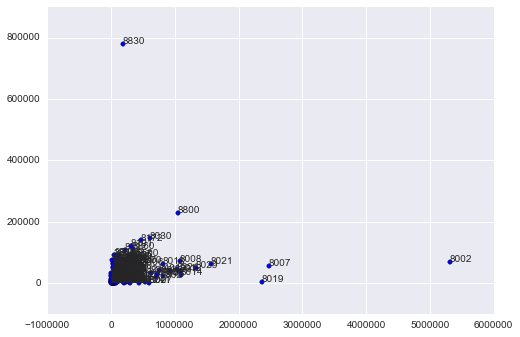

In [90]:
by='zipcode'
#by='day'
#by='weekday'
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=[by],columns = ['category'], aggfunc=np.sum)
fig, ax = plt.subplots()
x=pivbasic_stats.es_fashion
y=pivbasic_stats.es_home
ax.scatter(x, y)
pivbasic_stats.index
pivbasic_stats.es_fashion.values
for i, txt in enumerate(pivbasic_stats.index):
    ax.annotate(txt, (x.values[i],y.values[i]))

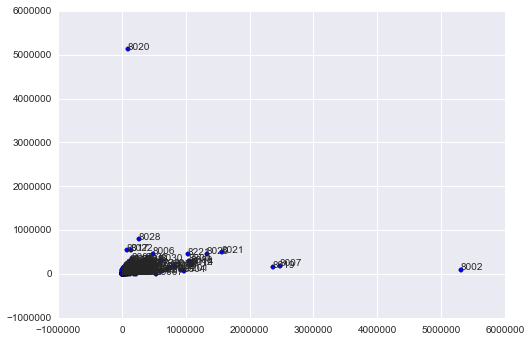

In [91]:
by=['zipcode']#,'day']# day weekday zipcode
values='amount' # avgReppays avgpaybymerch amountbymerch amount
columns = 'category'# avgReppays
withx='es_fashion'
withy='es_health'
pivbasic_stats=pd.pivot_table(basic_stats,values=values,index=by,columns=columns,aggfunc=np.sum)
fig, ax = plt.subplots()
x=pivbasic_stats[withx]
y=pivbasic_stats[withy]
ax.scatter(x, y)
pivbasic_stats.index
pivbasic_stats.es_fashion.values
for i, txt in enumerate(pivbasic_stats.index):
    ax.annotate(txt, (x.values[i],y.values[i]))
    
#aggfunc =np.mean    
#es_transportation    
#by='zipcode' , values='avgpaybymerch' -> 08040
#by='zipcode' , values='avgReppays' -> 08040, 08006...08008
#by='zipcode' ,values='amountbymerch' -> 08040...08002

#x=pivbasic_stats.es_health
#y=pivbasic_stats.es_food

#es_health ->08020 ?Clínica Dental Unidental
#es_fashion -> 08019, 08304, 08007,08002



category,es_auto,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
zipcode,,,,,,,,,,,,,,,,
8001,NaN,0.263256,0.573942,0.010264,-0.075779,-0.001352,-0.013875,0.044656,NaN,NaN,0.056696,-0.023072,0.339972,-0.025015,NaN,0.071102


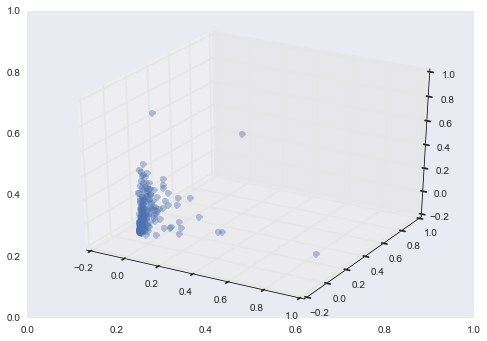

In [19]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
#ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
by=['zipcode']#,'day']# day weekday zipcode
values='amount' # avgReppays avgpaybymerch amountbymerch amount
columns = 'category'# avgReppays
withx='es_fashion'
withy='es_health'
withz='es_food'
pivbasic_stats=pd.pivot_table(basic_stats,values=values,index=by,columns=columns,aggfunc=np.sum)
#df_norm = (df - df.mean()) / (df.max() - df.min())
x=(pivbasic_stats[withx]-pivbasic_stats[withx].mean())/(pivbasic_stats[withx].max()-pivbasic_stats[withx].min())
y=(pivbasic_stats[withy]-pivbasic_stats[withy].mean())/(pivbasic_stats[withy].max()-pivbasic_stats[withy].min())
z=(pivbasic_stats[withz]-pivbasic_stats[withz].mean())/(pivbasic_stats[withz].max()-pivbasic_stats[withz].min())
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x.values, y.values, z.values, 'o', alpha=0.4)
pivbasic_stats.fillna(0)
pivbasic_stats[:1]
df_norm = (pivbasic_stats - pivbasic_stats.mean()) / (pivbasic_stats.max() - pivbasic_stats.min())
df_norm[:1]    

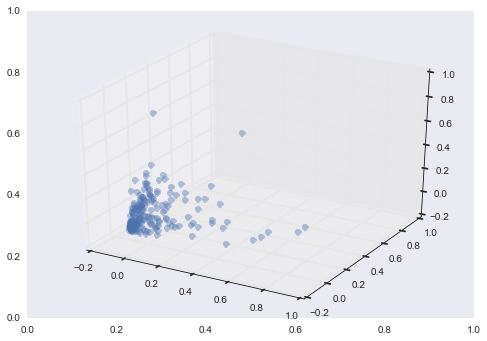

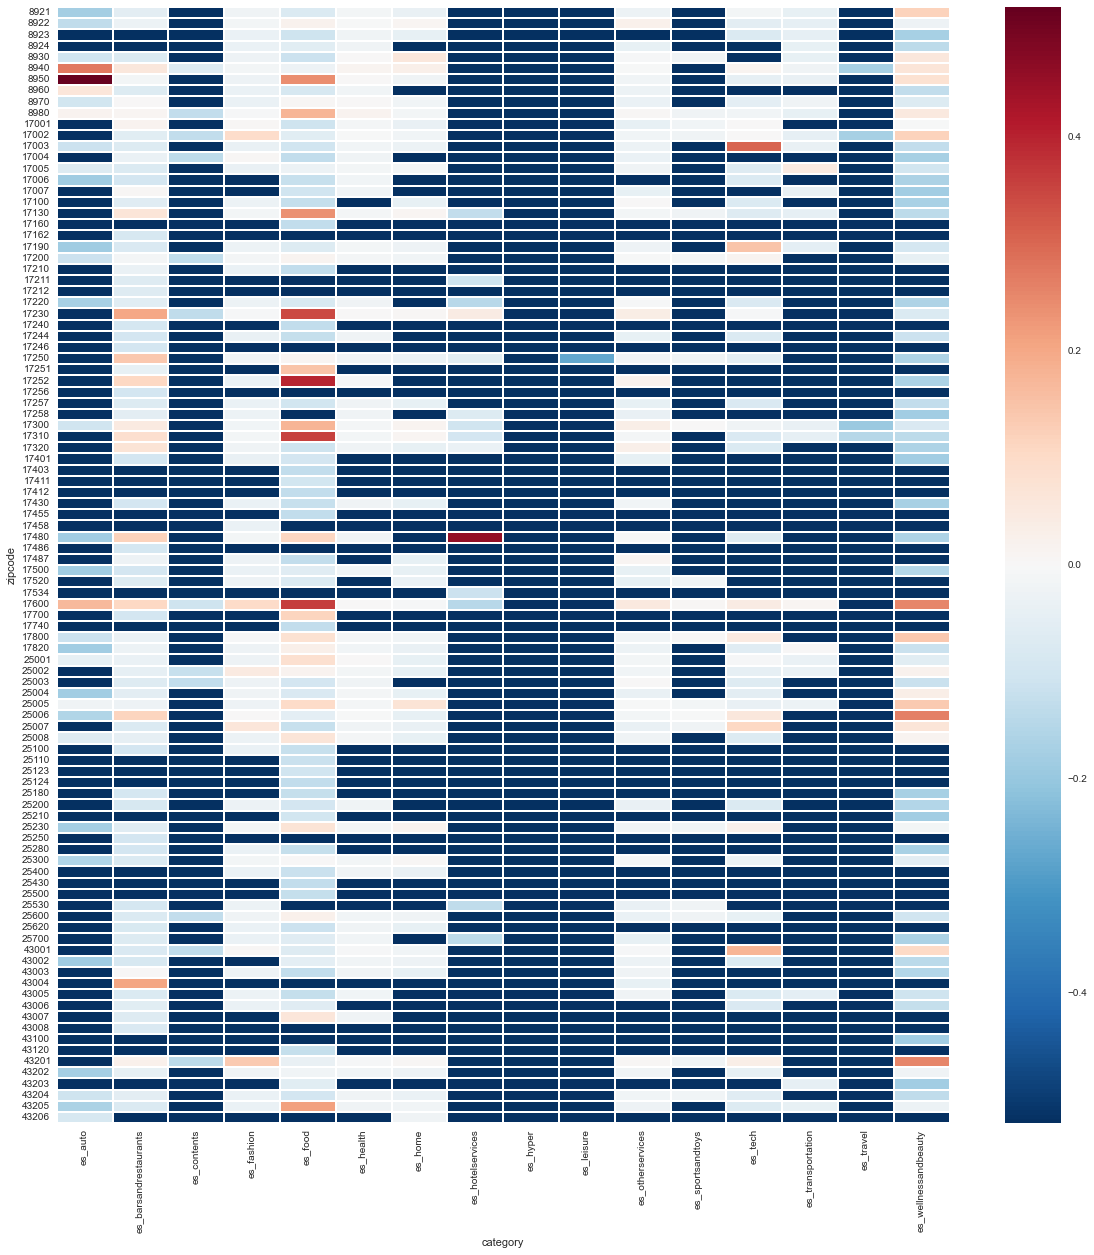

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
#ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
by=['zipcode']#,'day']# day weekday zipcode
values='amount' # avgReppays avgpaybymerch amountbymerch amount
columns = 'category'# avgReppays
withx='es_fashion' #es_barsandrestaurants
withy='es_health'
withz='es_food'
zipbycategory=pd.pivot_table(basic_stats,values=values,index=by,columns=columns,aggfunc=np.sum)
df_norm = (zipbycategory - zipbycategory.mean()) / (zipbycategory.max() - zipbycategory.min())
#df_norm = (df - df.mean()) / (df.max() - df.min())
x=df_norm[withx]
y=df_norm[withy]
z=df_norm[withz]
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x.values, y.values, z.values, 'o', alpha=0.4)
pivbasic_stats.fillna(0, inplace=True)
df_norm[:1]
plt.figure(figsize=(20,20))
sns.heatmap(df_norm[200:300])

category,es_auto,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
zipcode,,,,,,,,,,,,,,,,
8001,NaN,0.203775,0.038247,0.141282,0.023544,0.064777,0.012981,0.144264,NaN,NaN,0.071488,0.000318,0.241986,0.023768,NaN,0.033572


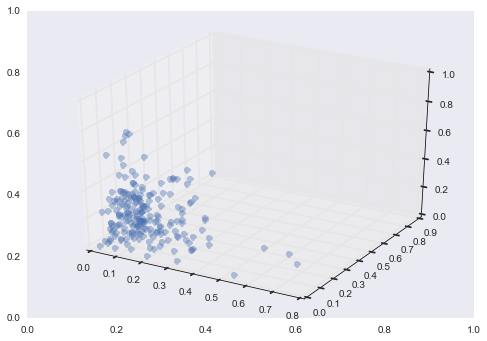

In [57]:

#unsupervised cluster based on distance = similarity in 16 types of categoriacal expenses (monthly -> daily?? how evolves?)
#zip=(amount1, ...., amount16) 
#df.fillna(0)
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
#ax.plot(ones[:, x1], ones[:, x2], ones[:, x3], 'o', markersize=8, color='blue', alpha=0.5, label='ones')
by=['zipcode']#,'day']# day weekday zipcode
values='amount' # avgReppays avgpaybymerch amountbymerch amount
columns = 'category'# avgReppays
withx='es_barsandrestaurants' #es_fashion
withy='es_health'
withz='es_food'
zipbycategory=pd.pivot_table(basic_stats,values=values,index=by,columns=columns,aggfunc=np.sum)
zipbycategory_row_norm=zipbycategory.apply(lambda r: r/r.sum(), axis=1)
zipbycategory_row_norm=zipbycategory_row_norm.fillna(0)
#zipbycategory["total"]=zipbycategory.apply(lambda r: r.sum(), axis=1)
x=zipbycategory_row_norm[withx]
y=zipbycategory_row_norm[withy]
z=zipbycategory_row_norm[withz]
fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x.values, y.values, z.values, 'o', alpha=0.4)
zipbycategory_row_norm[:1]

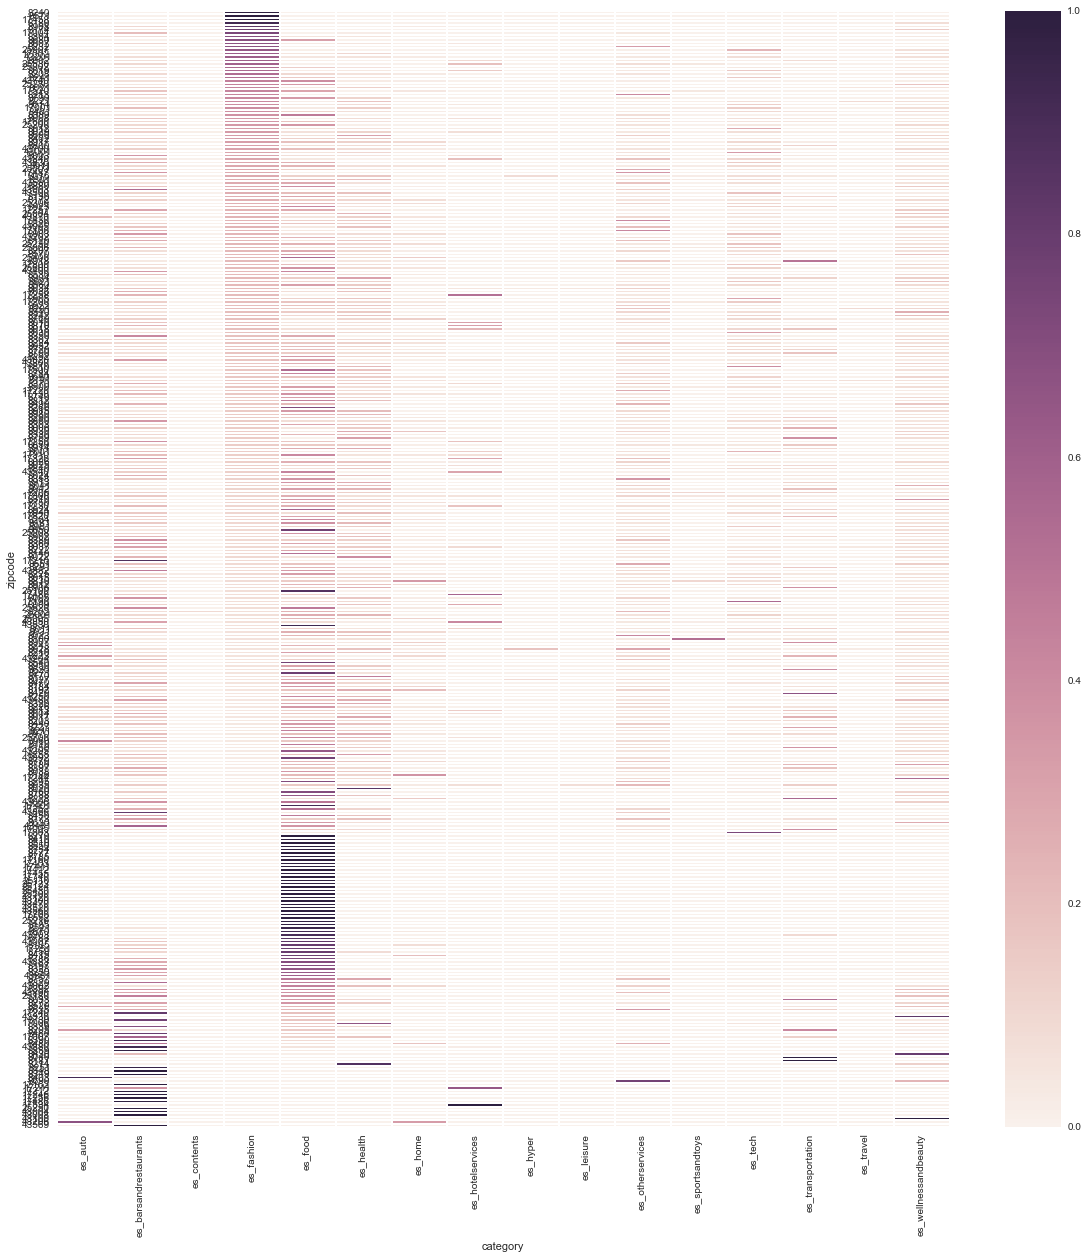

In [64]:
plt.figure(figsize=(20,20))
sns.heatmap(zipbycategory_row_norm.sort(['es_fashion', 'es_food'], ascending=[0, 0]))


category,es_auto,es_barsandrestaurants,es_contents,es_fashion,es_food,es_health,es_home,es_hotelservices,es_hyper,es_leisure,es_otherservices,es_sportsandtoys,es_tech,es_transportation,es_travel,es_wellnessandbeauty
zipcode,,,,,,,,,,,,,,,,
8001,0,0.203775,0.038247,0.141282,0.023544,0.064777,0.012981,0.144264,0,0,0.071488,0.000318,0.241986,0.023768,0,0.033572


[ 2  8 11  5  5  5  8 11  5 16  5 11  5 11  5 11  5 11  8  0 11  5 18  5  1
  1 17 18 11  2  1  1 14  5  5  5  5 17 14  1 17  4 12 17  5 15 17 14 12  0
 11  5  6  6 17 17  3  1 14  1  1 12  1  1 17 17 14  1  1  8 17 17 18  0 11
 17  9  1 17 17 17 14 12  8  6  8 11  9 17 10 12  3 12 19  1  1 17 12 11 11
 17  8 17 17 12 19  1 13  1 10 10 19 18 19  5  5 15 10 19  5 11 11  9  3 12
 14  7 17 19 13 19 13 18 17  3  9  3 11 12  3 18  3 17 15  6 11 14 17 18  1
 12  3  8 18  1  1 13 17  1  3  5 17 12 14 11  1  3  1  3 17  3 12 12 15 11
  2 17 11  1  5  1 10  5 16 15  1  5 11  1  2 14 14  6 11  1 17 17 17 11 14
 11  1 15 17  1  5 17  9  5  1 11  8  2  8 14  0 13 18 17  3 10  2 11 10 16
 10 18  5 13  7 10  5 12 19 10 19 16  1 17 16  3  3  3  3 18  3  6 16 10 18
 17 15 16 11  3  3 11 17 17  8 18 11  1 11  8 17  3  3  3  3 19 15  3  1 10
 15 11 15  3  3  8 15 19 17  2 17 13 10 11 19 12 10  7  3  8 11  3  5 12  9
  3  7 19  3  5 19 11  3  3 17  3 10 15 11 15  1 19 11 11 16 13 11 10 12 19
 12 19 12]


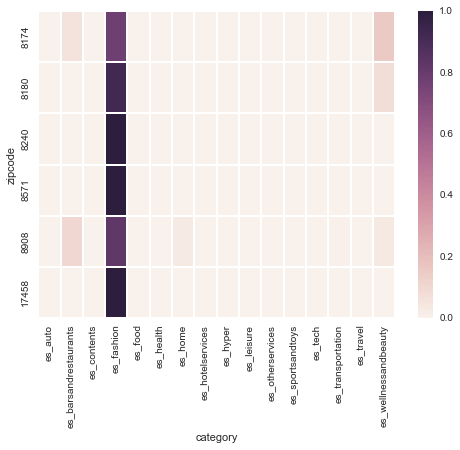

In [108]:
from sklearn import cluster
K=20 # Assuming to be 3 clusters!
clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
clf.fit(zipbycategory_row_norm)
print clf.labels_
#sns.heatmap(zipbycategory_row_norm[clf.predict(zipbycategory_row_norm)==2])
sns.heatmap(zipbycategory_row_norm[clf.predict(zipbycategory_row_norm)==6])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10ae21890>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11971da90>]], dtype=object)

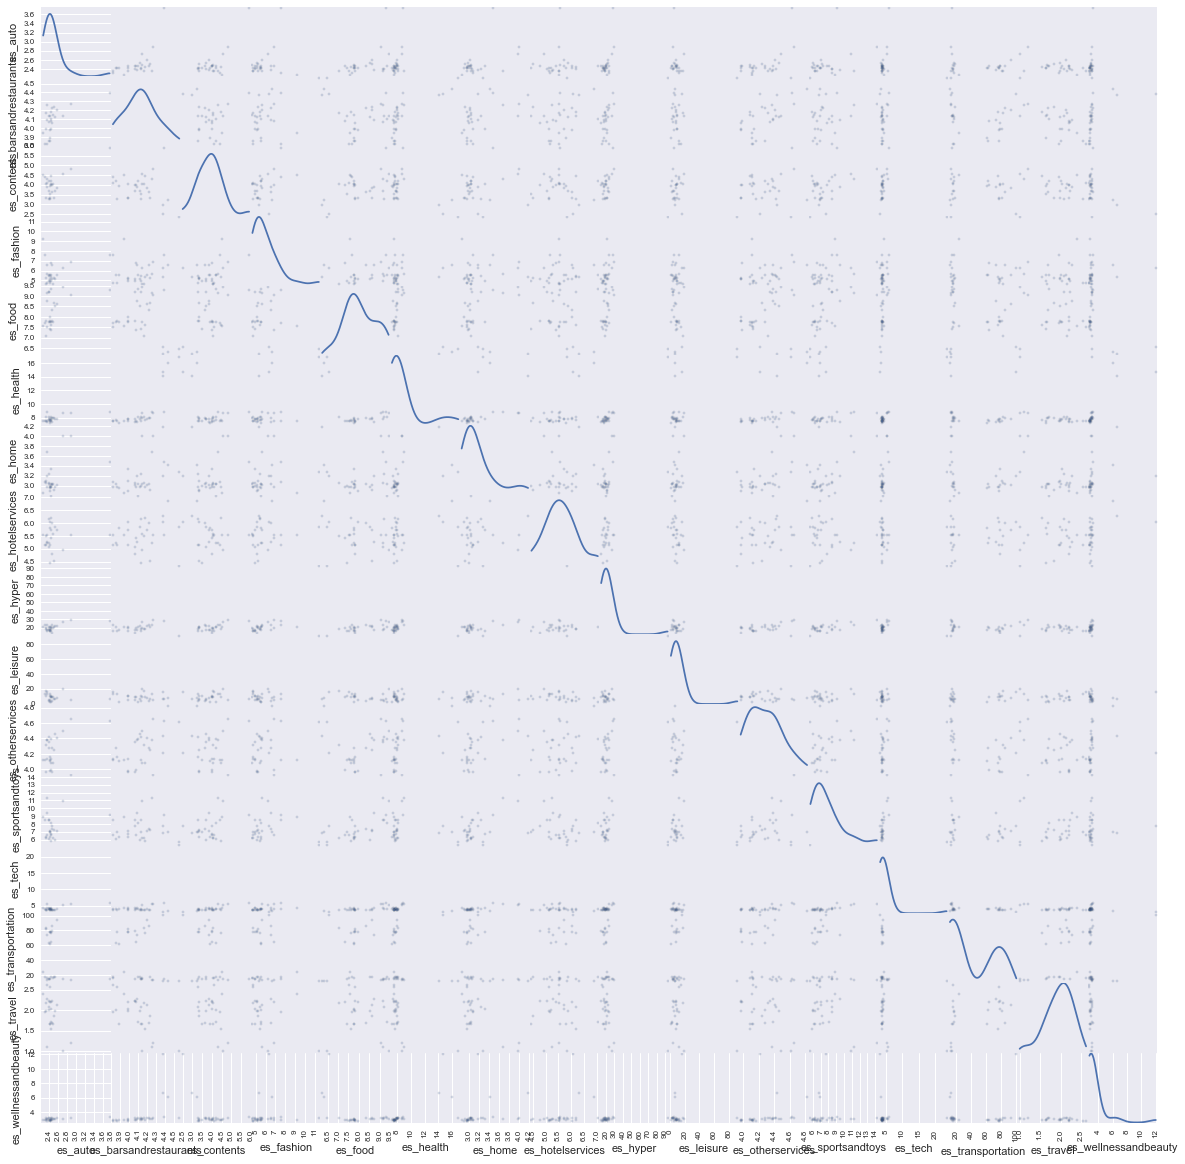

In [40]:
#by='zipcode'
by='day'
#by='weekday'
values='avgpaybymerch'
#values='avgRpays'
pivbasic_stats=pd.pivot_table(basic_stats, values=values, index=[by],columns = ['category'], aggfunc=np.mean)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(pivbasic_stats ,alpha=0.2, figsize=(20, 20), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x163cee4d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x16d820a90>]], dtype=object)

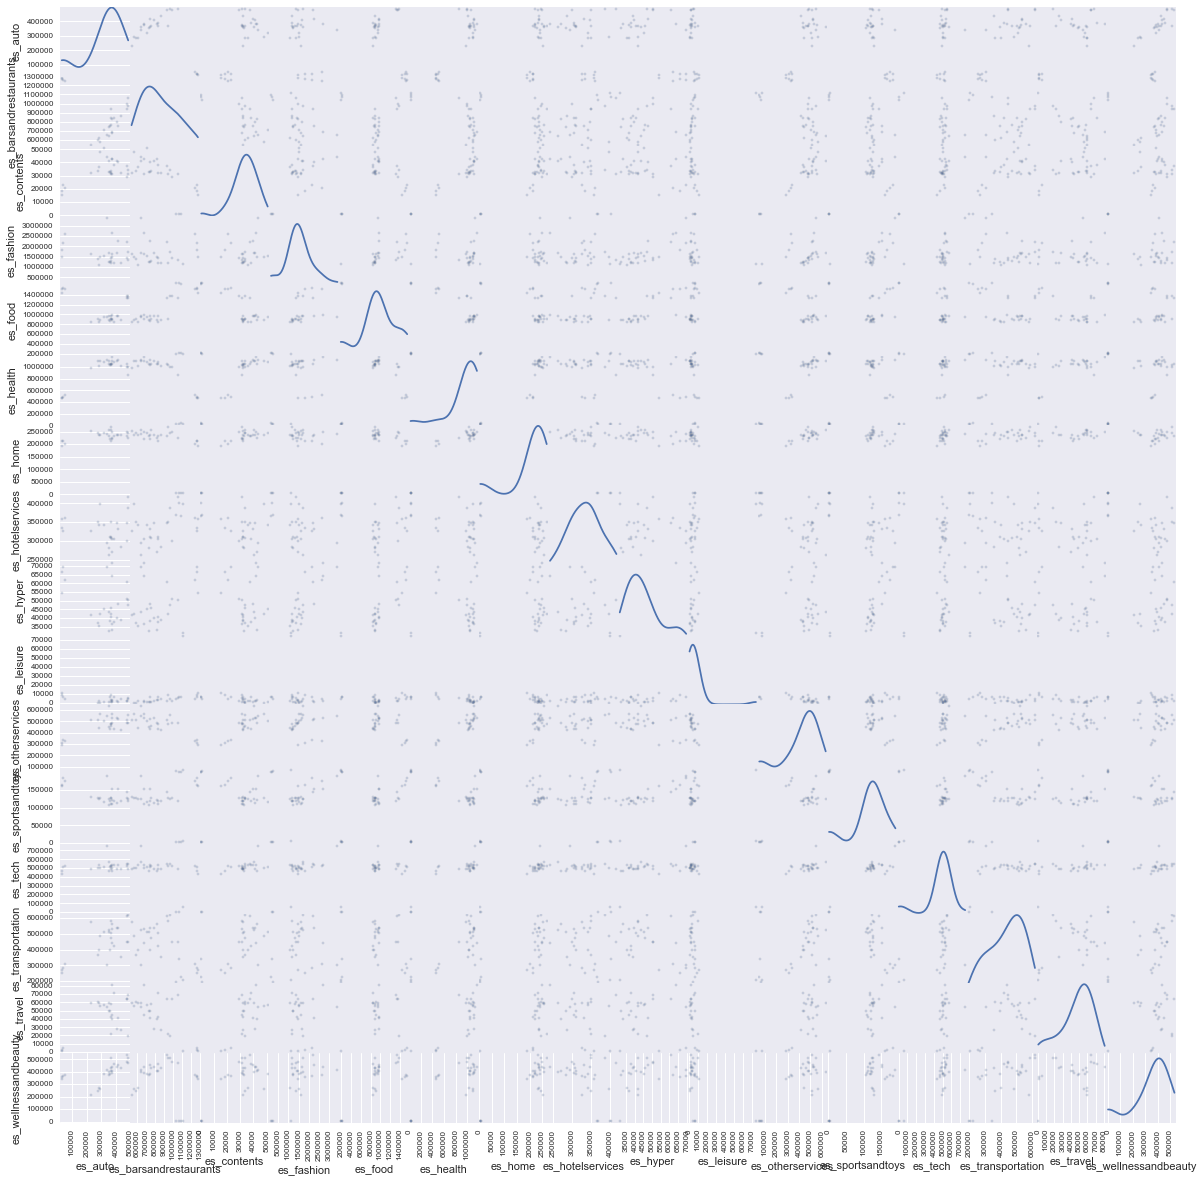

In [219]:
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=['date'],columns = ['category'], aggfunc=np.sum)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(pivbasic_stats ,alpha=0.2, figsize=(20, 20), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1188413d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x156ec2ed0>]], dtype=object)

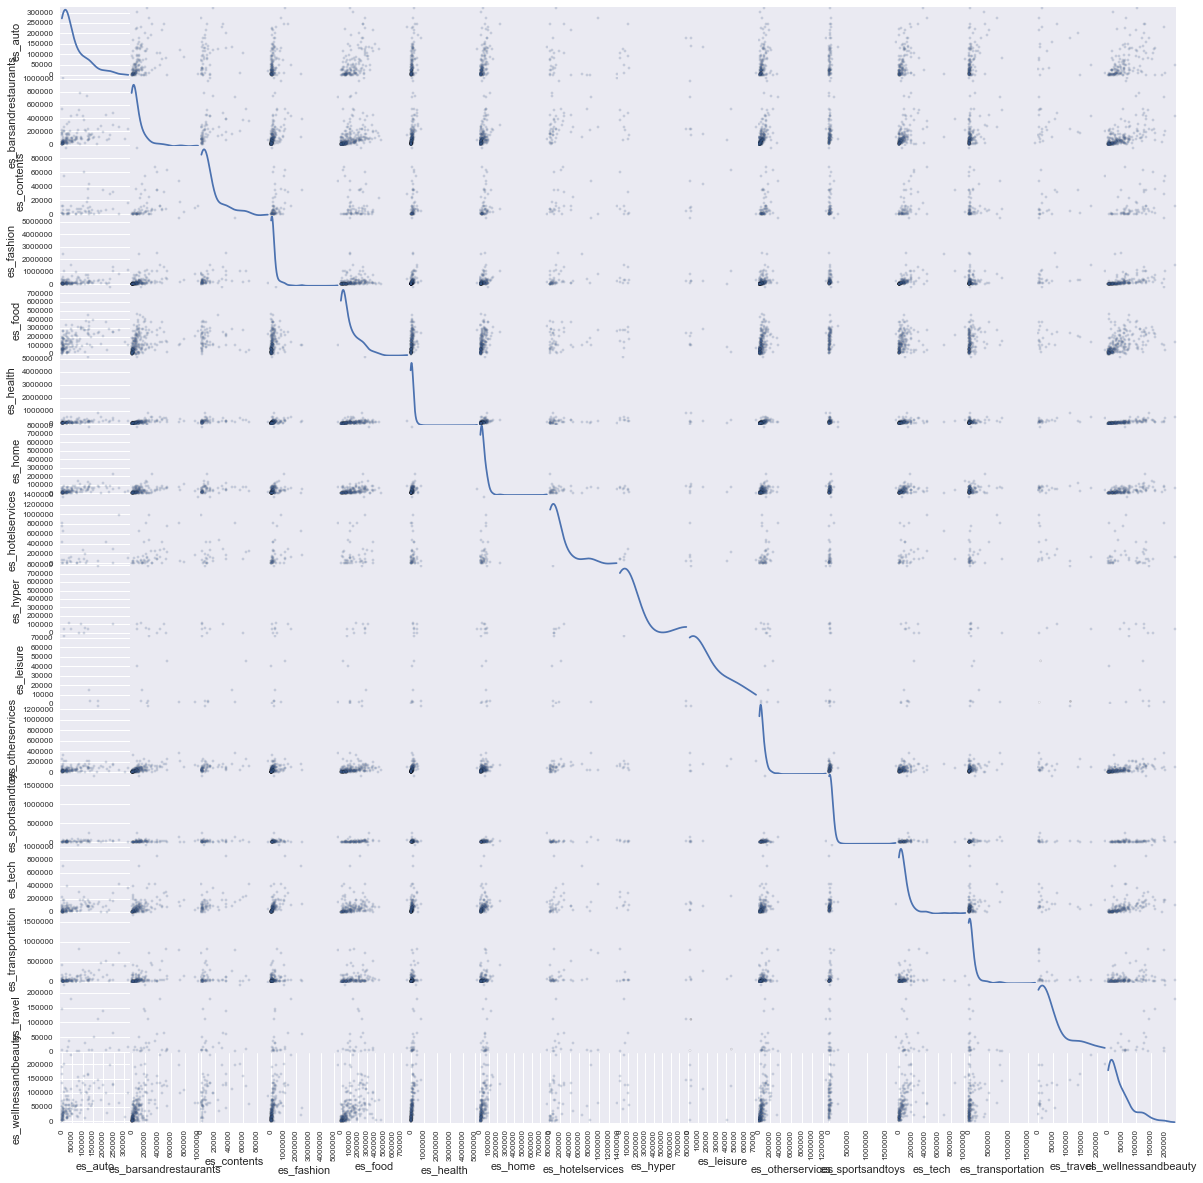

In [187]:
pivbasic_stats=pd.pivot_table(basic_stats, values='amount', index=['zipcode'],columns = ['category'], aggfunc=np.sum)
from pandas.tools.plotting import scatter_matrix
scatter_matrix(pivbasic_stats ,alpha=0.2, figsize=(20, 20), diagonal='kde')